In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('C:/Users/shrut/Downloads/spam.csv',encoding='ISO-8859-1')

In [5]:
df.head(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#Droping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#renaming columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [11]:
df.sample(5)

,Target,Text
3045,ham,So how's the weather over there?
3705,ham,Reading gud habit.. Nan bari hudgi yorge patai...
864,ham,Dude ive been seeing a lotta corvettes lately
4226,ham,Buy one egg for me da..please:)
1574,ham,My sis is catching e show in e afternoon so i'...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [13]:
df['Target']=encoder.fit_transform(df['Target'])

In [14]:
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [16]:
#checking duplicate values
df.duplicated().sum()

403

In [17]:
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [20]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

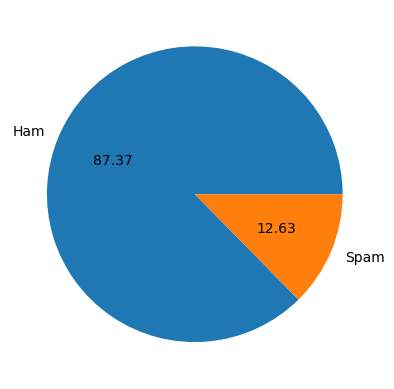

In [22]:
plt.pie(df['Target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

From the above piechart, we get to know that our data is imbalanced 

In [23]:
import nltk #natural language tool kit

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']=df['Text'].apply(len)

In [26]:
df.head(4)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [27]:
#fetching the number of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x))) #passing x as text

In [28]:
df.head(5)

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
#Ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#Spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


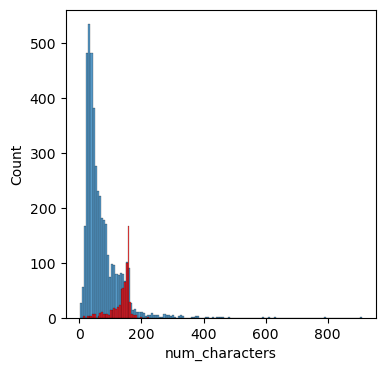

In [33]:
plt.figure(figsize=(4,4))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')
plt.show()

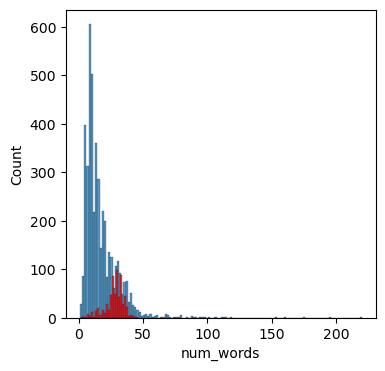

In [34]:
plt.figure(figsize=(4,4))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')
plt.show()

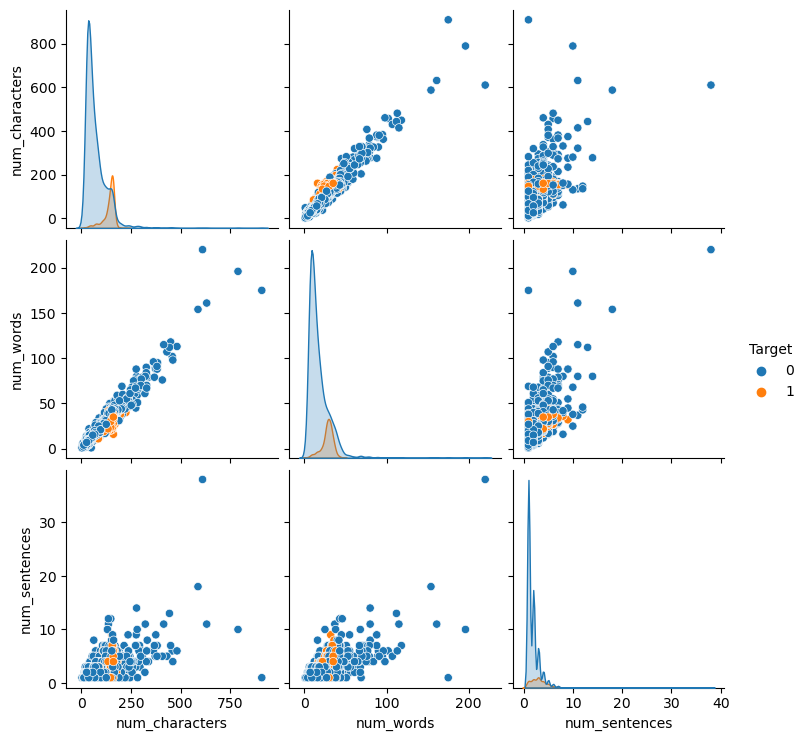

In [35]:
sns.pairplot(df,hue='Target') #relationship between them

C:\Users\shrut\AppData\Local\Temp\ipykernel_22364\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

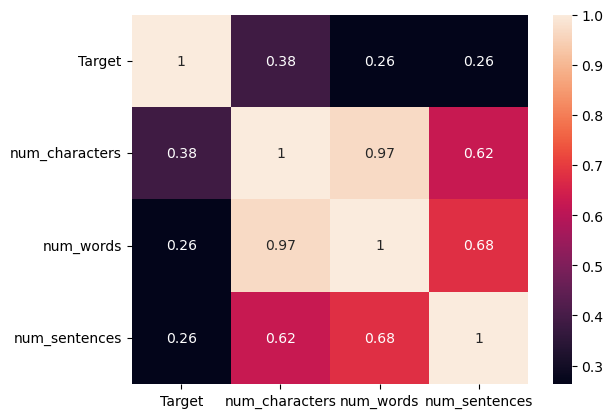

In [36]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [37]:
import nltk
from nltk.corpus import stopwords
import string #for punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
nltk.download('stopwords')

def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y=[] #removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:] #coping entire list
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return "  ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
transform_text('I loved the youtube video on machine learning!!.How about you?')

'love  youtub  video  machin  learn'

In [39]:
df['transform_text']=df['Text'].apply(transform_text)

In [40]:
df.head(4)

,Target,Text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [41]:
!pip install wordcloud

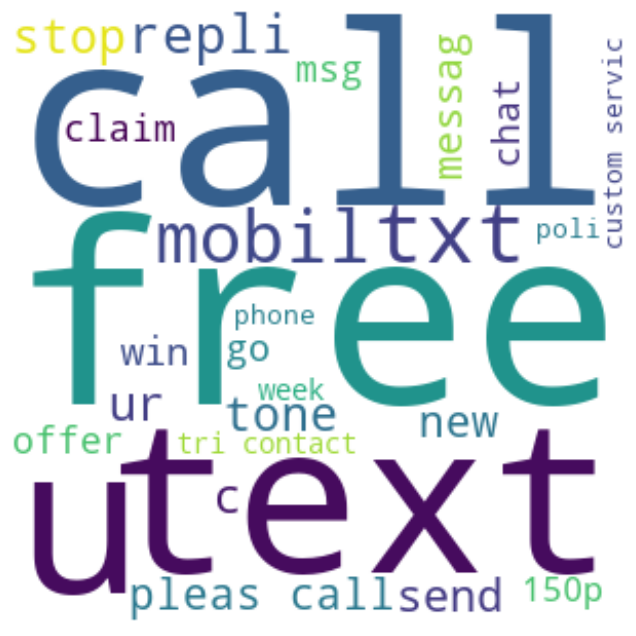

In [42]:
from wordcloud import WordCloud
spam_text = df[df['Target']==1]['transform_text'].str.cat(sep=" ")

if spam_text.strip():
    wc = WordCloud(width=300, height=300, min_font_size=10, background_color='white').generate(spam_text)
    plt.figure(figsize=(8, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No spam text available for word cloud.")


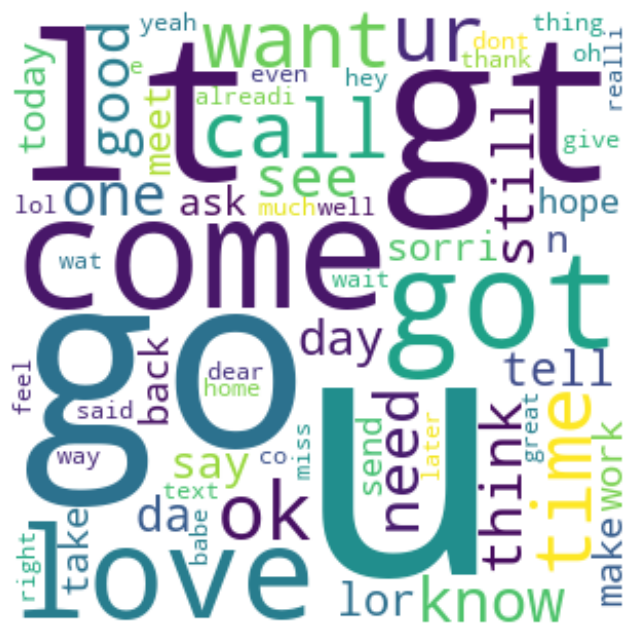

In [43]:
ham_text = df[df['Target']==0]['transform_text'].str.cat(sep=" ")

if ham_text.strip():
    wc = WordCloud(width=300, height=300, min_font_size=10, background_color='white').generate(ham_text)
    plt.figure(figsize=(8, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No spam text available for word cloud.")


In [44]:
spam_corpus=[]
for msg in df[df['Target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [46]:
len(spam_corpus)

9939

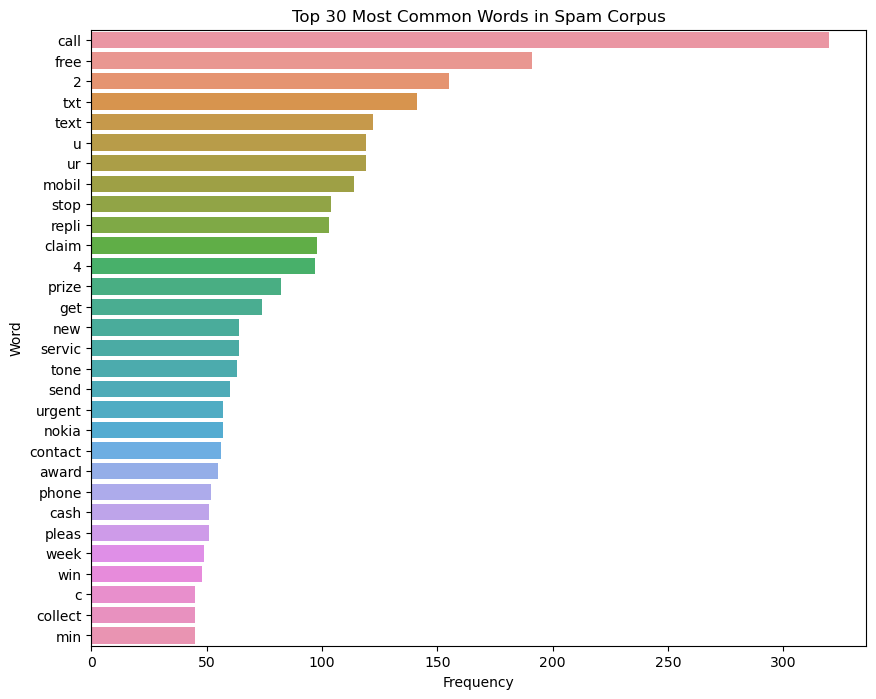

In [47]:
from collections import Counter

counter_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

plt.figure(figsize=(10,8))
sns.barplot(x='Frequency', y='Word', data=counter_df)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.show()


In [48]:
ham_corpus=[]
for msg in df[df['Target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

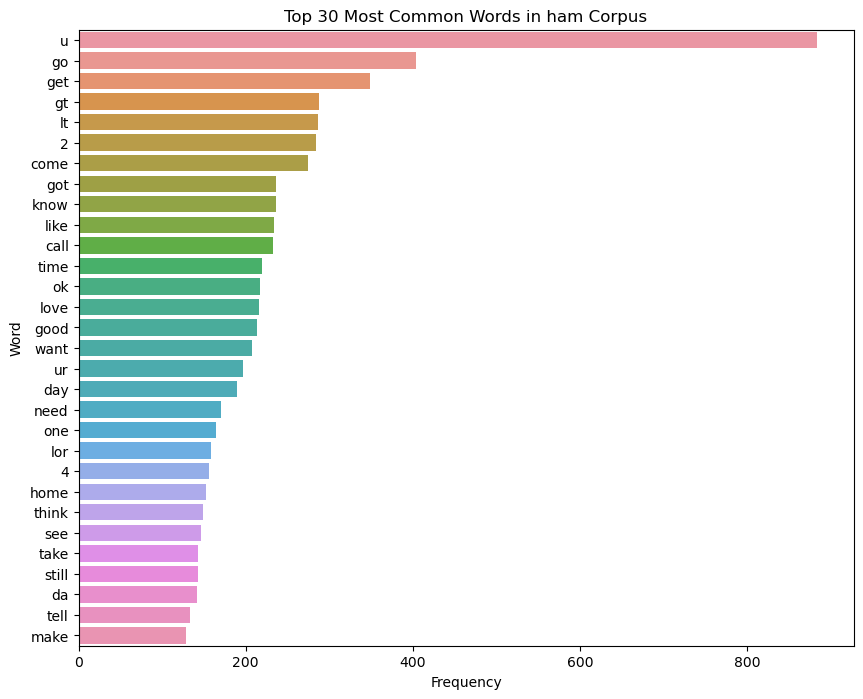

In [49]:

count_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

plt.figure(figsize=(10,8))
sns.barplot(x='Frequency', y='Word', data=count_df)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in ham Corpus')
plt.show()

# Model Builiding

In [50]:
#will use naive bayes as it performs better in textual data
#it accepts numerical values but in our case we have transform_text in the form of text
#so,need to convert in numerical or vectorization is done

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [52]:
x = tfidf.fit_transform(df['transform_text']).toarray()

In [53]:
x.shape

(5169, 3000)

In [54]:
y = df['Target'].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [59]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [60]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [61]:
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [62]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [63]:
# tfidf --> mnb

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [66]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'RF': rfc,
    'LR': lrc,
    'AB': abc,
    'BC': bc,
    'ETC': etc,
    'GBT': gbdt,
    'XGB': xgb
}

In [67]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [68]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [69]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print("For -", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For - SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For - KN
Accuracy - 0.9052224371373307
Precision - 1.0
For - NB
Accuracy - 0.9709864603481625
Precision - 1.0
For - DT
Accuracy - 0.9303675048355899
Precision - 0.8173076923076923
For - RF
Accuracy - 0.9758220502901354
Precision - 0.9829059829059829
For - LR
Accuracy - 0.9584139264990329
Precision - 0.9702970297029703
For - AB
Accuracy - 0.960348162475822
Precision - 0.9292035398230089
For - BC
Accuracy - 0.9584139264990329
Precision - 0.8682170542635659
For - ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For - GBT
Accuracy - 0.9468085106382979
Precision - 0.9191919191919192
For - XGB
Accuracy - 0.9671179883945842
Precision - 0.9262295081967213


In [70]:
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision',ascending=False)

In [71]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
4,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
5,LR,0.958414,0.970297
6,AB,0.960348,0.929204
10,XGB,0.967118,0.926230
9,GBT,0.946809,0.919192
7,BC,0.958414,0.868217


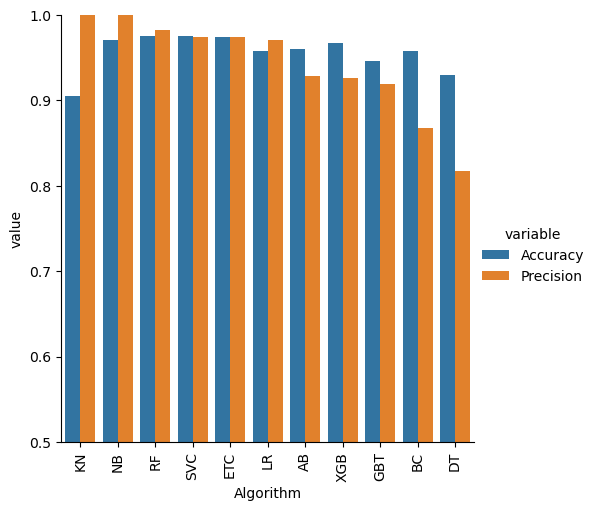

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert to long-form (melted) dataframe
performance_long_df = pd.melt(performance_df, 
                              id_vars='Algorithm', 
                              value_vars=['Accuracy', 'Precision'],
                              var_name='variable', 
                              value_name='value')

# Create the plot
sns.catplot(
    x='Algorithm',
    y='value',
    hue='variable',
    data=performance_long_df,
    kind='bar',
    height=5
)

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


In [74]:
# model improve
# 1. Change the max_features parameter of Tfidf

# Create a temporary DataFrame with model names and new scores
temp_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
}).sort_values('Precision_max_ft_3000',ascending=False)

# Merge with existing performance DataFrame
new_df = performance_df.merge(temp_df, on='Algorithm')

In [75]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,AB,0.960348,0.929204,0.960348,0.929204
7,XGB,0.967118,0.926230,0.967118,0.926230
8,GBT,0.946809,0.919192,0.946809,0.919192
9,BC,0.958414,0.868217,0.958414,0.868217


In [77]:
! pip install pickel

ERROR: Could not find a version that satisfies the requirement pickel (from versions: none)
ERROR: No matching distribution found for pickel


In [78]:
import pickel
pickel.dump(tdidf,open('vectorizer.pkl','wb'))
pickel.dump(mnb,open('model.pkl','wb'))

ModuleNotFoundError: No module named 'pickel'